<a href="https://colab.research.google.com/github/Shah-in-alam/AI-Basic-to-Advance/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is an Autoencoder?
An autoencoder is a type of neural network used for:
###. Dimensionality reduction
###. Anomaly detection
###. Noise removal
###. Feature learning

#How it works?
Component	Description
Encoder	Compresses input into a smaller latent space (bottleneck).
Bottleneck (Latent Space)	The "compressed representation" of the input.
Decoder	Reconstructs input from the compressed version.

📊 Real-World Use Cases:
Fraud detection (reconstruction error)

Denoising images

Compression (e.g., images, signals)

Feature extraction for clustering or classification



#Code : Autoencoder on MIST (Anomaly Detection Style)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0961 - val_loss: 0.0369
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0339 - val_loss: 0.0266
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.0258 - val_loss: 0.0223
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0219 - val_loss: 0.0196
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.0194 - val_loss: 0.0177
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


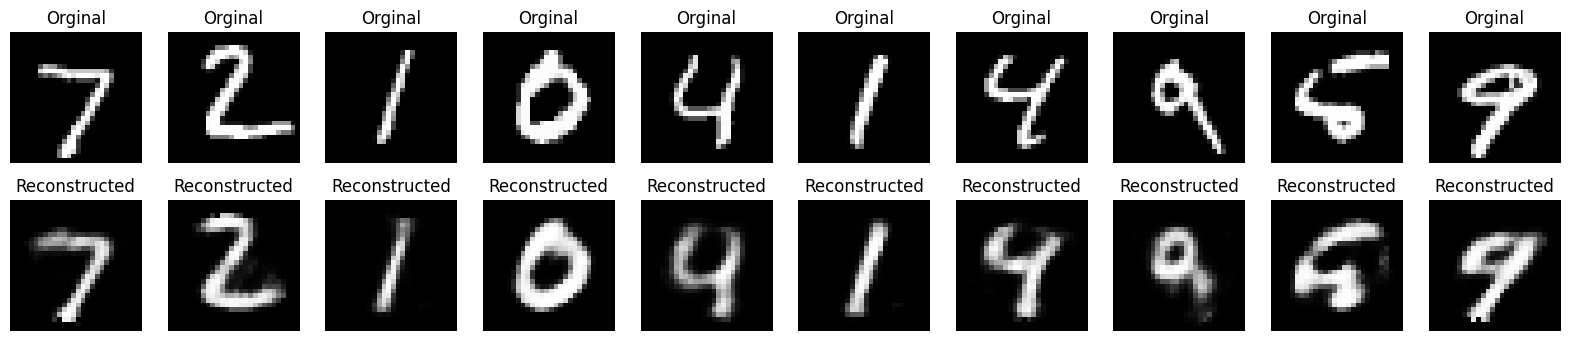

In [9]:
import tensorflow as tf
from tensorflow.keras import layers,models
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

#Load MINST
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train =x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0
x_train =x_train.reshape((-1,28*28))
x_test=x_test.reshape((-1,28*28))

#Buil Autoencoder

input_layer=tf.keras.Input(shape=(784,))
encoded=layers.Dense(128,activation='relu')(input_layer)
encoded=layers.Dense(64,activation='relu')(encoded)
bottleneck=layers.Dense(32,activation='relu')(encoded)

decoded=layers.Dense(64,activation='relu')(bottleneck)
decoded=layers.Dense(128,activation='relu')(decoded)
output_layers=layers.Dense(784,activation='sigmoid')(decoded)

autoencoder=models.Model(input_layer,output_layers)
autoencoder.compile(optimizer='adam',loss='mse')

#train
autoencoder.fit(x_train, x_train, epochs=5, batch_size=256, shuffle=True, validation_data=(x_test, x_test))
decoded_imgs=autoencoder.predict(x_test[:10])

#show orginal vs reconstructed

n=10
plt.figure(figsize=(20,4))
for i in range(n):
  #orginal
  ax=plt.subplot(2,n,i+1)
  plt.imshow(x_test[i].reshape(28,28),cmap="gray")
  plt.title("Orginal")
  plt.axis("off")

  #reconstructed
  ax=plt.subplot(2,n,i+1+n)
  plt.imshow(decoded_imgs[i].reshape(28,28),cmap="gray")
  plt.title("Reconstructed")
  plt.axis("off")
plt.show()


#Project Title: Anomaly Detection in Handwritten Digits using Autoencoder
#Goal:
Build an autoencoder model using MNIST dataset to learn how normal digits (e.g., 0–9) look. Then, identify anomalies based on reconstruction error — useful in scenarios like fraud detection, data integrity, or detecting unusual handwriting.

In [10]:
# 2. Use only digits 0–4 for training (normal class)
normal_idx = y_train <= 4
x_train_normal = x_train[normal_idx]
autoencoder.fit(x_train_normal, x_train_normal,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_split=0.2)

Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0168 - val_loss: 0.0159
Epoch 2/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0157 - val_loss: 0.0154
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0151 - val_loss: 0.0150
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0145 - val_loss: 0.0145
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0142 - val_loss: 0.0141
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0138 - val_loss: 0.0138
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0134 - val_loss: 0.0133
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0130 - val_loss: 0.0132
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0127 - val_loss: 0.0129
Epoch 10/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0126 - val_loss: 0.0127
Epoch 11/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - loss: 0.0123 - val_loss: 0.0127
Epoch 12/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
ROC AUC for anomaly detection: 0.82


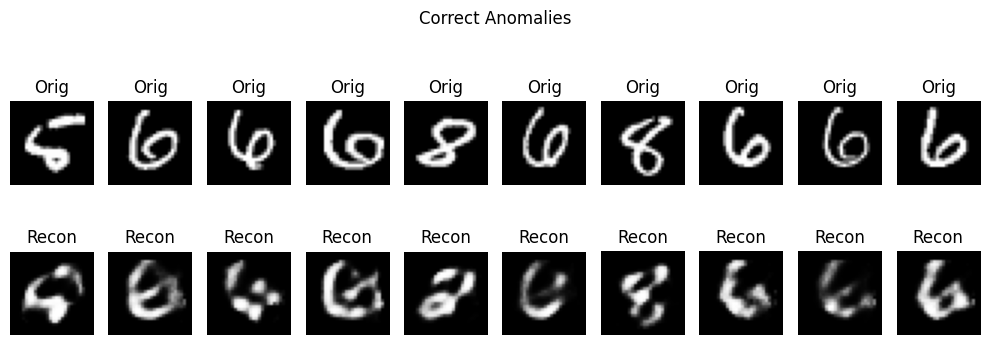

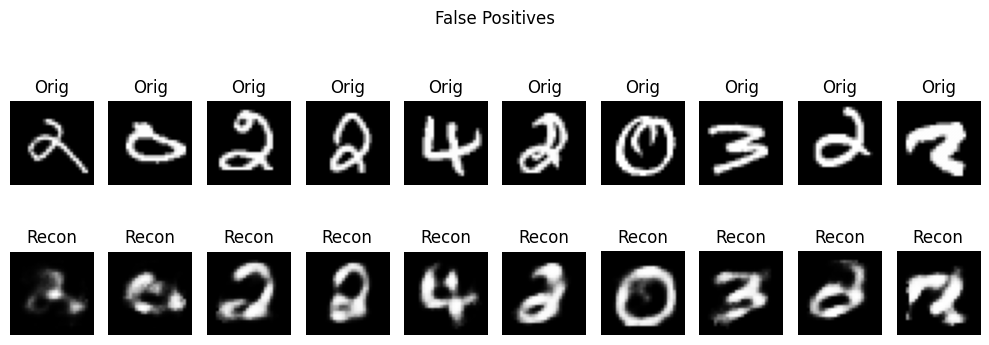

In [13]:
from sklearn.metrics import roc_auc_score
# 5. Compute reconstruction errors on full test set
reconstructions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - reconstructions, 2), axis=1)

# 6. Define anomalies: digits 5–9 as anomalies
true_labels = (y_test >= 5).astype(int)  # 1 = anomaly, 0 = normal

# 7. ROC AUC score
roc = roc_auc_score(true_labels, mse)
print(f"ROC AUC for anomaly detection: {roc:.2f}")

# 8. Set threshold based on quantile
threshold = np.quantile(mse, 0.95)  # 95% threshold
predicted_anomalies = (mse > threshold).astype(int)

# 9. Visualize some results
def plot_examples(indexes, title):
    plt.figure(figsize=(10, 4))
    for i, idx in enumerate(indexes[:10]):
        ax = plt.subplot(2, 10, i + 1)
        plt.imshow(x_test[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
        ax.set_title("Orig")

        ax = plt.subplot(2, 10, i + 11)
        plt.imshow(reconstructions[idx].reshape(28, 28), cmap="gray")
        plt.axis("off")
        ax.set_title("Recon")

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Visualize correctly detected anomalies
correct_anomalies = np.where((true_labels == 1) & (predicted_anomalies == 1))[0]
plot_examples(correct_anomalies, "Correct Anomalies")

# Visualize false positives (normal detected as anomaly)
false_positives = np.where((true_labels == 0) & (predicted_anomalies == 1))[0]
plot_examples(false_positives, "False Positives")

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 0.1331 - val_loss: 0.0599
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0541 - val_loss: 0.0414
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0393 - val_loss: 0.0315
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0302 - val_loss: 0.0271
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0264 - val_loss: 0.0248
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0241 - val_loss: 0.0228
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0222 - val_loss: 0.0211
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.0206 - val_loss: 0.0198
Epoch 9/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0195 - val_loss: 0.0189
Epoch 10/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0186 - val_loss: 0.0182
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


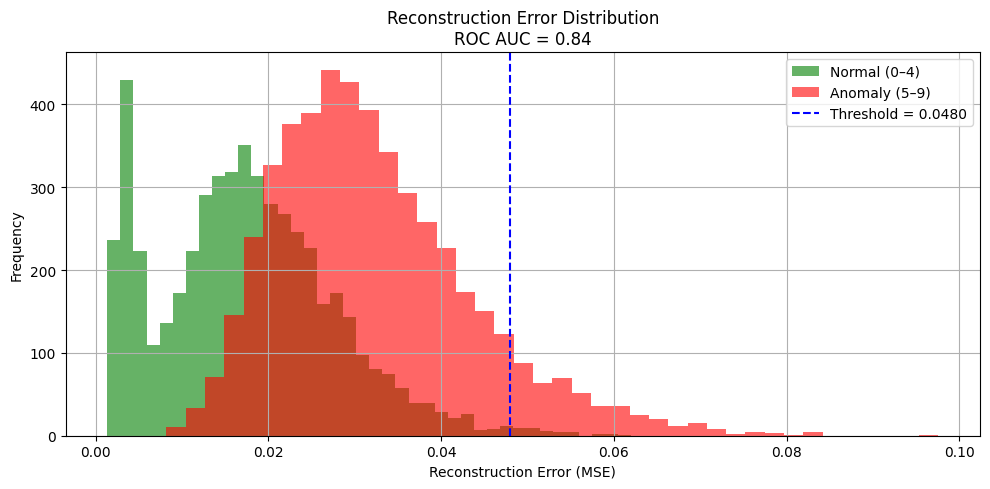

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# 1. Load and preprocess MNIST data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# 2. Use only digits 0-4 for training (normal class)
x_train_normal = x_train[y_train <= 4]

# 3. Build Autoencoder model
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
bottleneck = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(bottleneck)
decoded = Dense(128, activation='relu')(decoded)
output = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, output)
autoencoder.compile(optimizer='adam', loss='mse')

# 4. Train Autoencoder
autoencoder.fit(x_train_normal, x_train_normal,
                epochs=10, batch_size=256, shuffle=True, verbose=1,
                validation_split=0.2)

# 5. Predict reconstruction on full test set
reconstructions = autoencoder.predict(x_test)
mse = np.mean(np.power(x_test - reconstructions, 2), axis=1)

# 6. Define true labels: 0 for digits 0–4 (normal), 1 for 5–9 (anomaly)
true_labels = (y_test >= 5).astype(int)

# 7. ROC AUC score
roc_auc = roc_auc_score(true_labels, mse)

# 8. Threshold using 95th percentile
threshold = np.quantile(mse, 0.95)
predicted_anomalies = (mse > threshold).astype(int)

# 9. Plot error histogram with threshold line
plt.figure(figsize=(10, 5))
plt.hist(mse[true_labels == 0], bins=40, alpha=0.6, label='Normal (0–4)', color='green')
plt.hist(mse[true_labels == 1], bins=40, alpha=0.6, label='Anomaly (5–9)', color='red')
plt.axvline(threshold, color='blue', linestyle='--', label=f'Threshold = {threshold:.4f}')
plt.title(f"Reconstruction Error Distribution\nROC AUC = {roc_auc:.2f}")
plt.xlabel("Reconstruction Error (MSE)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Cybersecurity – Network Intrusion Detection using Deep Autoencoder
#🎯 Goal:
Detect anomalous network activity (e.g., hacking attempts, port scanning, DDoS) using a deep autoencoder trained only on normal traffic.

[20 15 19 21 18 17 16 12 14 11  2 13 10  9  8  7  3  5  1  6  0  4]
Epoch 1/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.0919 - val_loss: 0.0154
Epoch 2/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0148 - val_loss: 0.0141
Epoch 3/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0140 - val_loss: 0.0139
Epoch 4/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0139 - val_loss: 0.0138
Epoch 5/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0137 - val_loss: 0.0137
Epoch 6/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0137 - val_loss: 0.0137
Epoch 7/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0137 - val_loss: 0.0137
Epoch 8/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0137 - val_loss: 0.0136
Epoch 9/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0135 - val_loss: 0.0135
Epoch 10/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0135 - val_loss: 0.0135
Epoch 11/30
222/222 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss:

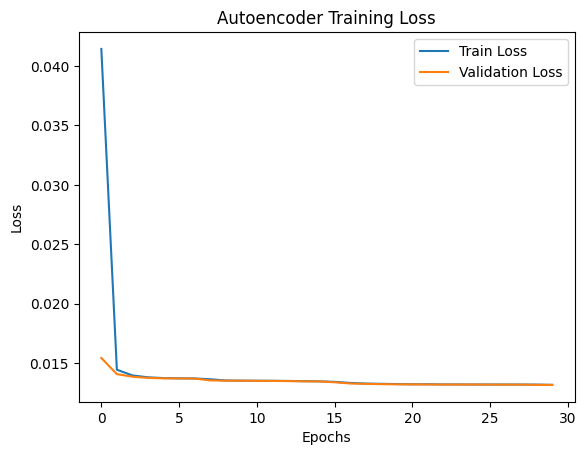

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# Step 1: Load dataset
url = "https://raw.githubusercontent.com/Jehuty4949/NSL_KDD/master/KDDTrain%2B.txt"
cols = [
    'duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land',
    'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
    'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
    'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login',
    'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
    'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
    'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
    'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'label'
]
df = pd.read_csv(url, names=cols)
print(df['label'].unique())

# Step 2: Convert label to binary (0 = normal, 1 = attack)
df['label'] = df['label'].apply(lambda x: 0 if str(x).strip() == 'normal.' else 1)
# Step 3: Separate features and labels
X = df.drop('label', axis=1)
y = df['label'].values

# Step 4: Preprocess features
numeric_cols = X.select_dtypes(include='number').columns.tolist()
cat_cols = X.select_dtypes(exclude='number').columns.tolist()

preprocessor = ColumnTransformer([
    ('num', MinMaxScaler(), numeric_cols),
    ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), cat_cols)
])

X_processed = preprocessor.fit_transform(X)

# Step 5: Info


# Step 6: Train only on normal samples (unsupervised anomaly detection)

# Step 7: Build the autoencoder model
input_dim = X_processed.shape[1]
input_layer = Input(shape=(input_dim,))
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)
x = Dense(32, activation='relu')(x)
encoded = Dense(16, activation='relu')(x)
x = Dense(32, activation='relu')(encoded)
x = Dense(64, activation='relu')(x)
x = Dense(128, activation='relu')(x)
output = Dense(input_dim, activation='sigmoid')(x)

autoencoder = Model(input_layer, output)
autoencoder.compile(optimizer=Adam(), loss='mse')

# Step 8: Train the model
history = autoencoder.fit(
    X_processed, X_processed,
    epochs=30,
    batch_size=512,
    validation_split=0.1,
    shuffle=True
)

# Optional: Plot loss curves
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Autoencoder Training Loss")
plt.show()
